The New York government website only provides monthly data sets for download. Therefore, this code file merges them into a yearly one for later use and performs data cleaning as well.

At last, there are two yearly data sets, one consisting of data for 2022 and the other representing data for 2023.

The data set for 2022 covers the whole year, while the one for 2023 only covers until the end of April.

In [63]:
# pip install pyarrow
# pip install fastparquet
import pandas as pd
import pickle
from collections import Counter
import matplotlib.pyplot as plt

Read the file name list of the data files in the folder for a given year.

In [64]:
# set the year of the data to read
year = 2022

# set the path of the data folder
path = 'C:/Users/Administrator/practicumProject2/yellow_tripdata_{}/'.format(year)

# read file list
with open(path+'fileList.txt', 'r') as file:
    lines = file.readlines()
fileList = [t.strip() for t in lines ]

Read the data in each file according to the file name list, and merge them into a single data frame.

In [65]:
# select the columns to read
columnsUsed = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'PULocationID', 'DOLocationID']

# read the first file
df = pd.read_parquet(path+fileList[0], columns = columnsUsed)

# rea the remained files by loop
print('The progress of the loop:')
for k in range(1, len(fileList)):
    print([k, len(fileList)])
    temp = pd.read_parquet(path+fileList[k], columns = columnsUsed)
    df = pd.concat([df, temp], ignore_index = True)

    
print('\nThe shape of the data frame: ', df.shape, '\n')
print('The type of each column: ')
print(df.dtypes)

The progress of the loop:
[1, 12]
[2, 12]
[3, 12]
[4, 12]
[5, 12]
[6, 12]
[7, 12]
[8, 12]
[9, 12]
[10, 12]
[11, 12]

The shape of the data frame:  (39656098, 5) 

The type of each column: 
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
PULocationID                      int64
DOLocationID                      int64
dtype: object


Show all the unique values of the year in the date-time columns to check for any abnormal values. If any are found, correct the abnormalities.

In [66]:
# Display all the unique values in the data set
years = [x.year for x in df['tpep_pickup_datetime']]
print('All the unique values of year in "tpep_pickup_datetime":')
print(set(years))
print('\n')

years = [x.year for x in df['tpep_dropoff_datetime']]
print('All the unique values of year in "tpep_dropoff_datetime":')
print(set(years))

All the unique values of year in "tpep_pickup_datetime":
{2021, 2022, 2023, 2001, 2002, 2003, 2008, 2009, 2012}


All the unique values of year in "tpep_dropoff_datetime":
{2021, 2022, 2023, 2001, 2002, 2003, 2008, 2009, 2012}


In [67]:
# correct the mistakenly labeled number in 'tpep_pickup_datetime'
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: x.replace(year=2022) if x.year != 2022 else x)

# correct the mistakenly labeled number in 'tpep_dropoff_datetime'
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: x.replace(year=2022) if x.year != 2022 else x)

Redisplay all the unique values of year to verify the correction effect.

In [68]:
# Display all the unique values in the data set
years = [x.year for x in df['tpep_pickup_datetime']]
print('All the unique values of year in "tpep_pickup_datetime":')
print(set(years))
print('\n')

years = [x.year for x in df['tpep_dropoff_datetime']]
print('All the unique values of year in "tpep_dropoff_datetime":')
print(set(years))

All the unique values of year in "tpep_pickup_datetime":
{2022}


All the unique values of year in "tpep_dropoff_datetime":
{2022}


Show all the unique values in the'passenger_count' column to check for any abnormal values. If any are found, correct the abnormalities.

In [69]:
# Display all the unique values in the data set
passenger_counts = list(set(df['passenger_count']))
print('The number of unique values in "passenger_count" is', len(passenger_counts), '\n')
print('Display the first 100 values:\n', passenger_counts[0:100])

The number of unique values in "passenger_count" is 1368313 

Display the first 100 values:
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


Generate the distribution of various values of "passenger_count".

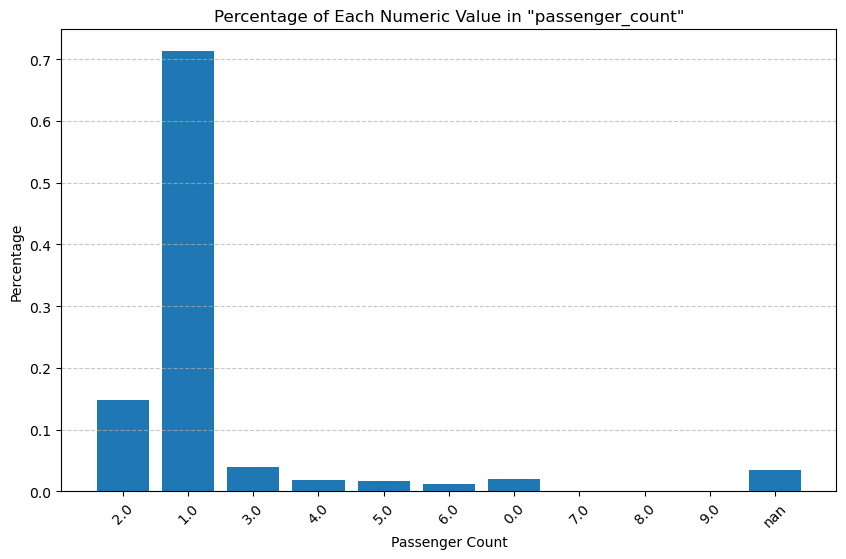

In [70]:
# drop all nan rows
df_no_NA = df.dropna()

# Count the number of each non-nan value
value_counts = Counter(list(df_no_NA['passenger_count']))

# take out all values and their weights
values = list(value_counts.keys())
weights = list(value_counts.values())
weights = [x/len(df) for x in weights]

# Add the percentage of nan value
values.append('nan')
values = [str(x) for x in values]
weights.append((len(passenger_counts) - 10) / len(df))

# draw the distribution of the values in column 'passenger_count'
plt.figure(figsize=(10, 6))
plt.bar(values, weights)
plt.xlabel('Passenger Count')
plt.ylabel('Percentage')
plt.title('Percentage of Each Numeric Value in "passenger_count"')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

According to the above histogram, we replace the NaN values with 1.0, the most frequent value, to minimize the information loss.

In [71]:
# replace the na value with 1.0
df['passenger_count'].fillna(1.0, inplace=True)

# conver the float to int to save memory
df['passenger_count'] = df['passenger_count'].astype('int')

# set the type of ids as short integer to save memory
df['PULocationID'] = df['PULocationID'].astype('int')
df['DOLocationID'] = df['DOLocationID'].astype('int')

print(df.dtypes)

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int32
PULocationID                      int32
DOLocationID                      int32
dtype: object


In [72]:
# save the file to disk
with open('C:/Users/Administrator/practicumProject2/yellow_taxi_tripdata_{}.pickle'.format(year), 'wb') as file:
    pickle.dump(df, file)